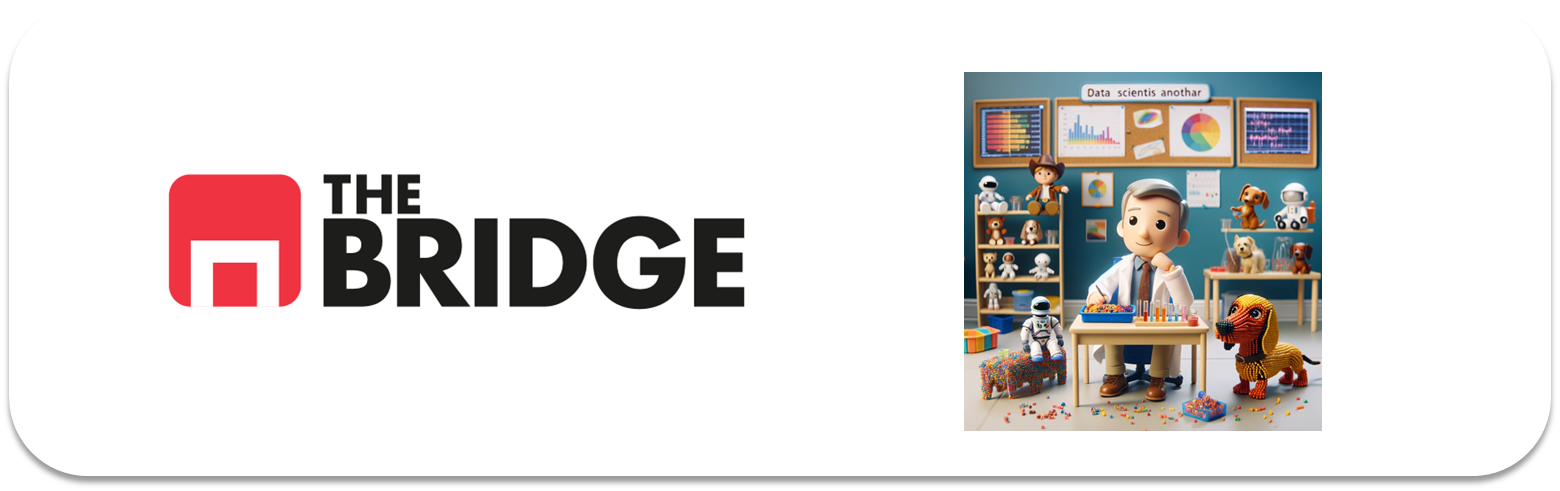

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [3]:

import seaborn as sns




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df_nulos = []
for columna, nulos in df_titanic.isnull().sum().items():
    if nulos != 0:
        df_nulos.append({columna:nulos})
df_nulos

[{'age': 177}, {'embarked': 2}, {'deck': 688}, {'embark_town': 2}]

In [8]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [10]:
# de momento, los nulos los dejaré tal y como están hasta que analice un poco más el dataset

df_nulos_porcentaje = (df_titanic.isnull().sum() / len(df_titanic)) *100
df_nulos_porcentaje

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [11]:
print(df_titanic["age"].unique())
print(df_titanic["embarked"].unique())
print(df_titanic["deck"].unique())
print(df_titanic["embark_town"].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
['S' 'C' 'Q' nan]
[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [12]:
df_titanic.drop("parch",axis=1,inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
df_titanic.duplicated

<bound method DataFrame.duplicated of      survived  pclass     sex   age  sibsp     fare embarked   class    who  \
0           0       3    male  22.0      1   7.2500        S   Third    man   
1           1       1  female  38.0      1  71.2833        C   First  woman   
2           1       3  female  26.0      0   7.9250        S   Third  woman   
3           1       1  female  35.0      1  53.1000        S   First  woman   
4           0       3    male  35.0      0   8.0500        S   Third    man   
..        ...     ...     ...   ...    ...      ...      ...     ...    ...   
886         0       2    male  27.0      0  13.0000        S  Second    man   
887         1       1  female  19.0      0  30.0000        S   First  woman   
888         0       3  female   NaN      1  23.4500        S   Third  woman   
889         1       1    male  26.0      0  30.0000        C   First    man   
890         0       3    male  32.0      0   7.7500        Q   Third    man   

     adult_ma

In [14]:
import matplotlib.pyplot as plt

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

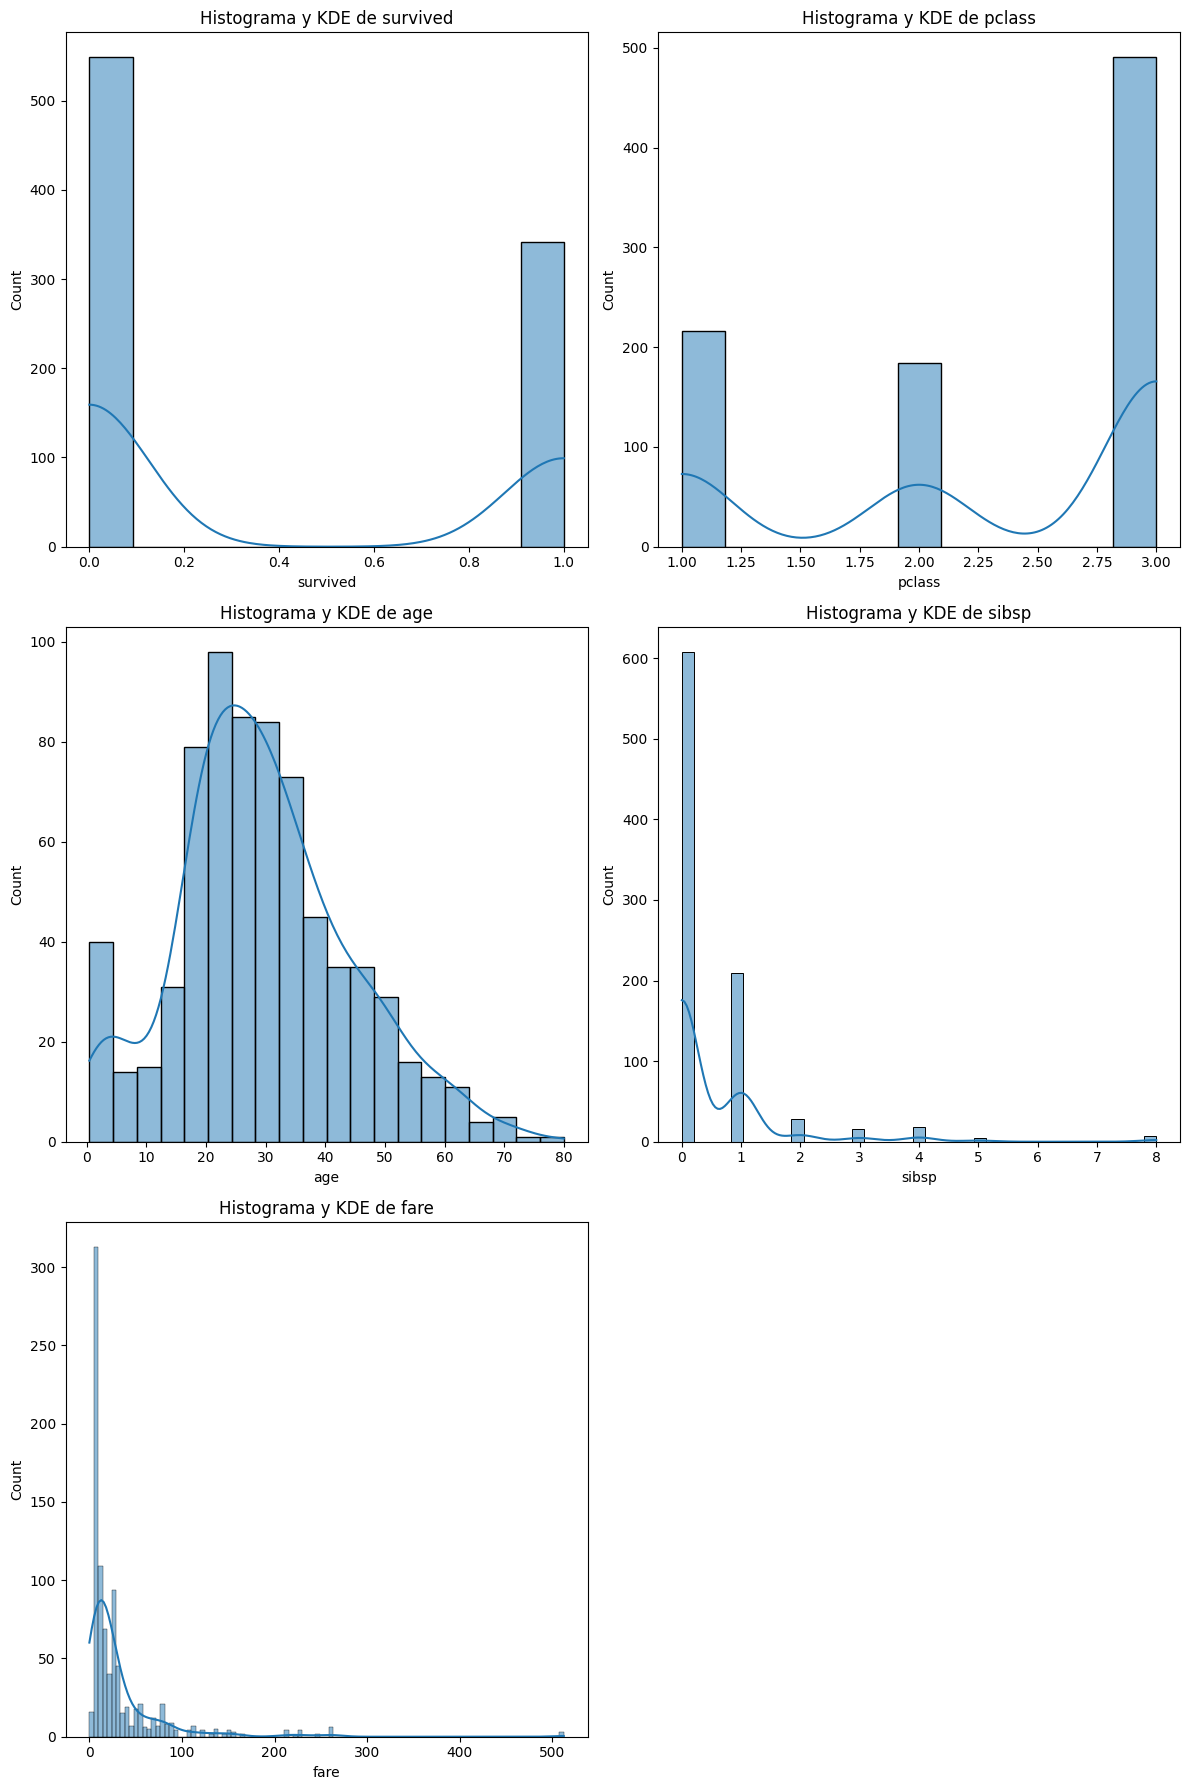

In [15]:
columnas_numericas = df_titanic.describe().columns.to_list()

plot_histo_den(df_titanic,columnas_numericas)

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived|columna binaria 0/1 sobre si la persona ha sobrevivido (0) o no (1)|
|pclass|clase del barco en la que viaja la persona en número (class en string)|
|sex|género de la persona|
|age|edad de la persona|
|sibsp|numero de familiares que viajaban con la persona |
|fare|columna sobre el precio del ticket dependiendo de la clase en la que viaja la persona|
|embarked|ciudad donde embarcó la persona|
|class|clase del barco en la que viaja la persona en string|
|who|indica si la persona era un niño o un adulto|
|adult_male|binaria True/False de si la persona era un hombre adulto|
|deck|ubicación de los camarotes|
|embark_town|incial de la letra de la ciudad donde embarcó la persona|
|alive|binaria no/yes de si se encontró viva a la persona (yes) o no (no)|
|alone|binaria True/False de si la persona estaba sola (True) o no (False) cuando se encontró|


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [16]:
df_titanic.embarked = df_titanic.embark_town
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [17]:
import pandas as pd

df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic) * 100, df_titanic.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,88,9.876543,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


In [18]:
df_tipificacion["Clasificada_como"] = "Categórica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numérica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numérica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categórica
sex,2,0.224467,object,Binaria
age,88,9.876543,float64,Numérica Discreta
sibsp,7,0.785634,int64,Categórica
fare,248,27.833895,float64,Numérica Discreta
embarked,3,0.3367,object,Categórica
class,3,0.3367,category,Categórica
who,3,0.3367,object,Categórica
adult_male,2,0.224467,bool,Binaria


In [19]:
variables_categóricas = df_tipificacion[df_tipificacion["Clasificada_como"].isin(["Categórica", "Binaria"])].index.tolist()
variables_categóricas

['survived',
 'pclass',
 'sex',
 'sibsp',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

### #2.2 Numéricas

In [20]:
variables_numericas = df_tipificacion[df_tipificacion["Clasificada_como"].isin(["Numérica Discreta", "Numérica Continua"])].index.tolist()
variables_numericas

['age', 'fare']

In [58]:
variables_priorizadas = ["survived","who","age","fare","class","embarked","alone"]
variables_categoricas_priorizadas = []

for variable in variables_categóricas:
    if variable in variables_priorizadas:
        variables_categoricas_priorizadas.append(variable)

variables_categoricas_priorizadas

['survived', 'embarked', 'class', 'who', 'alone']

In [24]:
df_titanic.describe().loc["mean"]

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
fare        32.204208
Name: mean, dtype: float64

Notas:
* Aproximadamente el 38% de los pasajeros sobrevivieron
* La clase del pasajero que se repite más en promedio es la 2 (ya que el número está cerca de 2).
* La edad promedio era 29, casi 30 años
* Familiares a bordo, en promedio 1 o ninguno
* El valor promedio del billete es de 32


In [80]:
df_titanic.describe().loc["50%"] #mediana

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
fare        14.4542
Name: 50%, dtype: float64

In [34]:
df_titanic.describe().loc["max"]

survived      1.0000
pclass        3.0000
age          80.0000
sibsp         8.0000
fare        512.3292
Name: max, dtype: float64

* Hay dispersión, por lo que tendremos que seguir ivnestigando, sobre todo en 'survived', 'pclass' y 'fare'.

In [61]:
df_titanic[variables_categoricas_priorizadas].mode().T

,0
survived,0
embarked,Southampton
class,Third
who,man
alone,True


Notas:
* La moda en categóricas dice que la mayoria sobrevivió
* Embarcó desde Southampton
* Viajaba en tercera clase
* Era un hombre adulto
* E iba solo
__________________________________________

* Frecuencia absoluta:

In [64]:
for catego in variables_categoricas_priorizadas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n")

Para survived
survived
0    549
1    342
Name: count, dtype: int64


Para embarked
embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64


Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64


Para alone
alone
True     537
False    354
Name: count, dtype: int64




* Las modas parecen bastante representativas teniendo en cuenta los valors absolutos, y bastante diferente de lo que obtuvimos en las medias

In [66]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


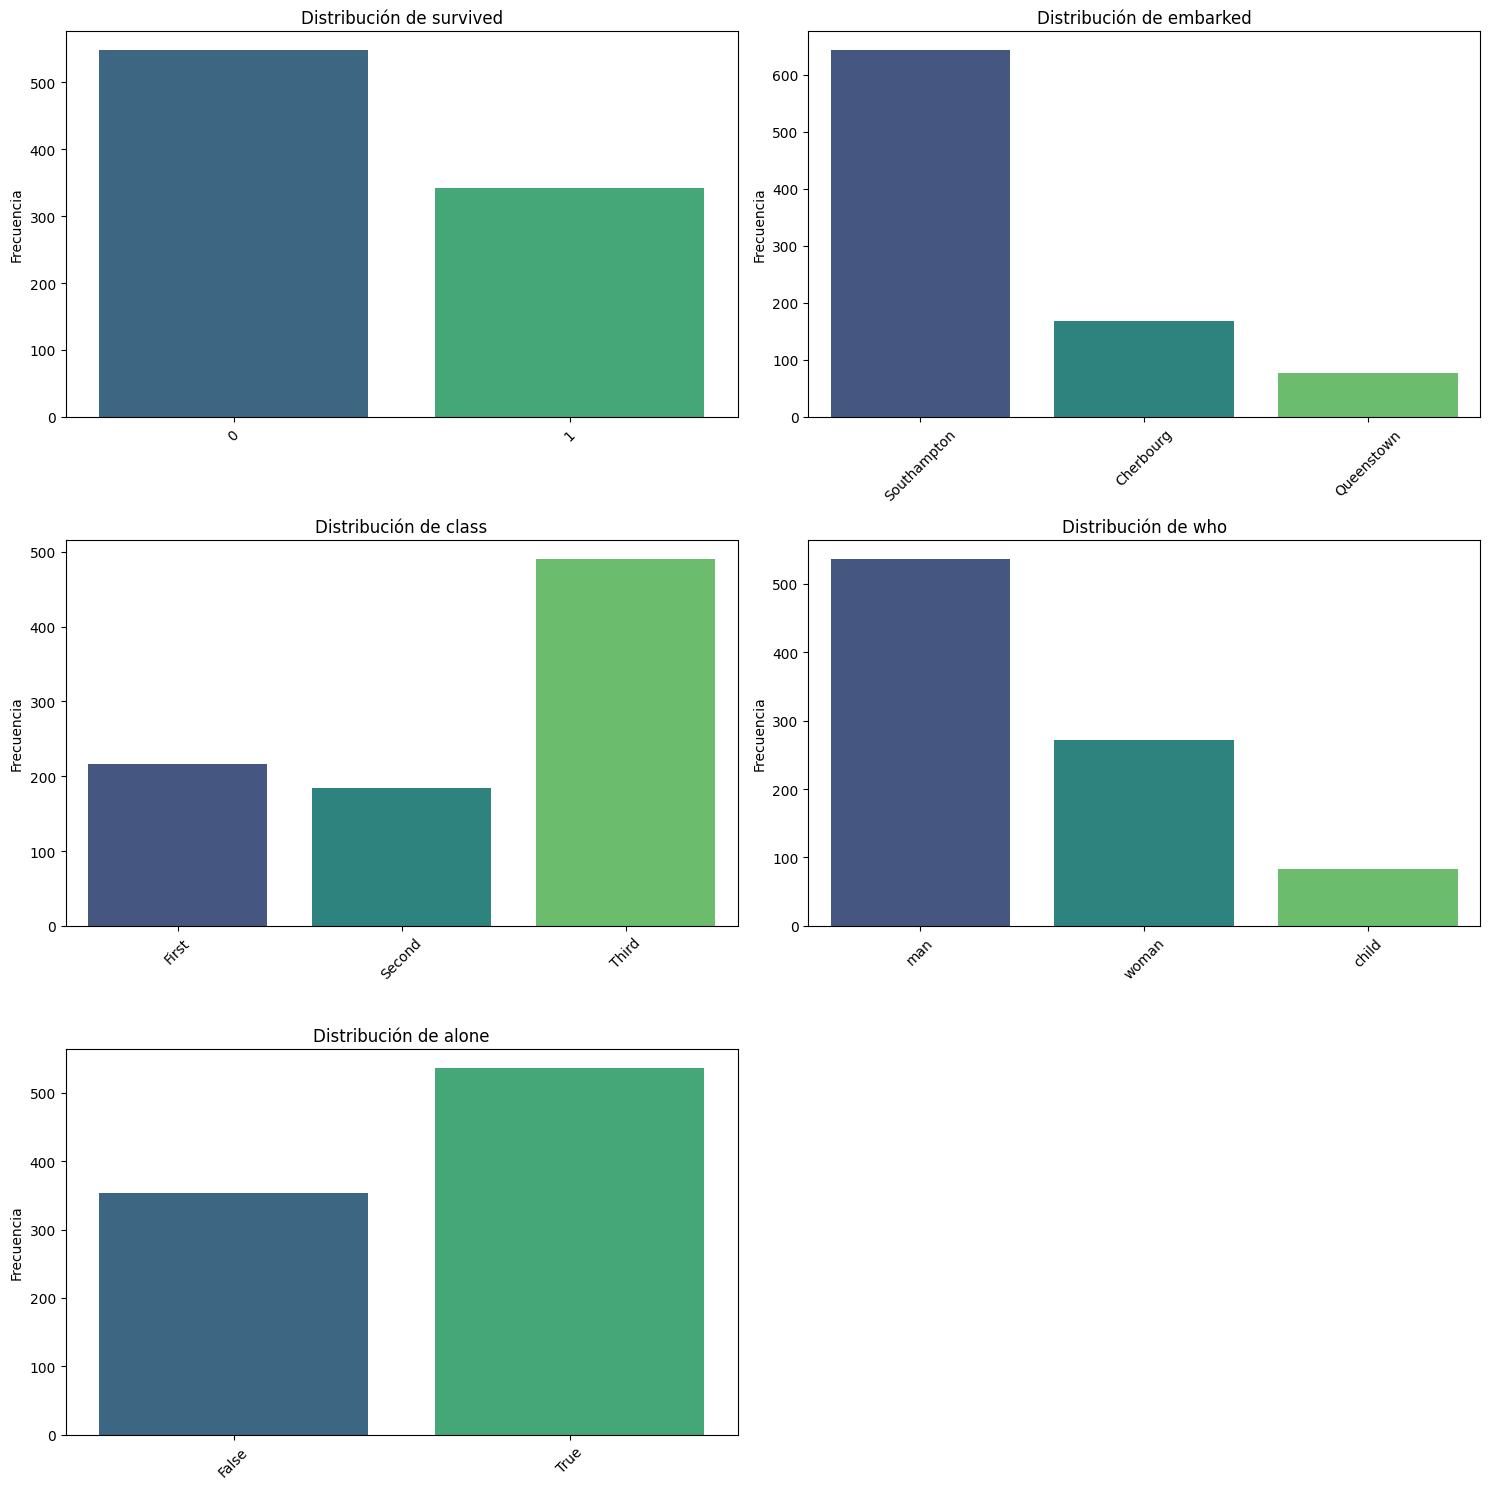

In [67]:
pinta_distribucion_categoricas(df_titanic, variables_categoricas_priorizadas)

Resultados de la frecuencia absoluta:
* Las tendencias son bastante claras en los gráficos para la frecuencia absoluta y confirmamos lo que habiamos analizado
* Es interesante la relación entre 'embarked' y 'who', quizás también 'alone'
_______________________________________________________

* Frecuencia relativa:

In [69]:
for catego in variables_categoricas_priorizadas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n")

Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64


Para embarked
embarked
Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64


Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64


Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64


Para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64




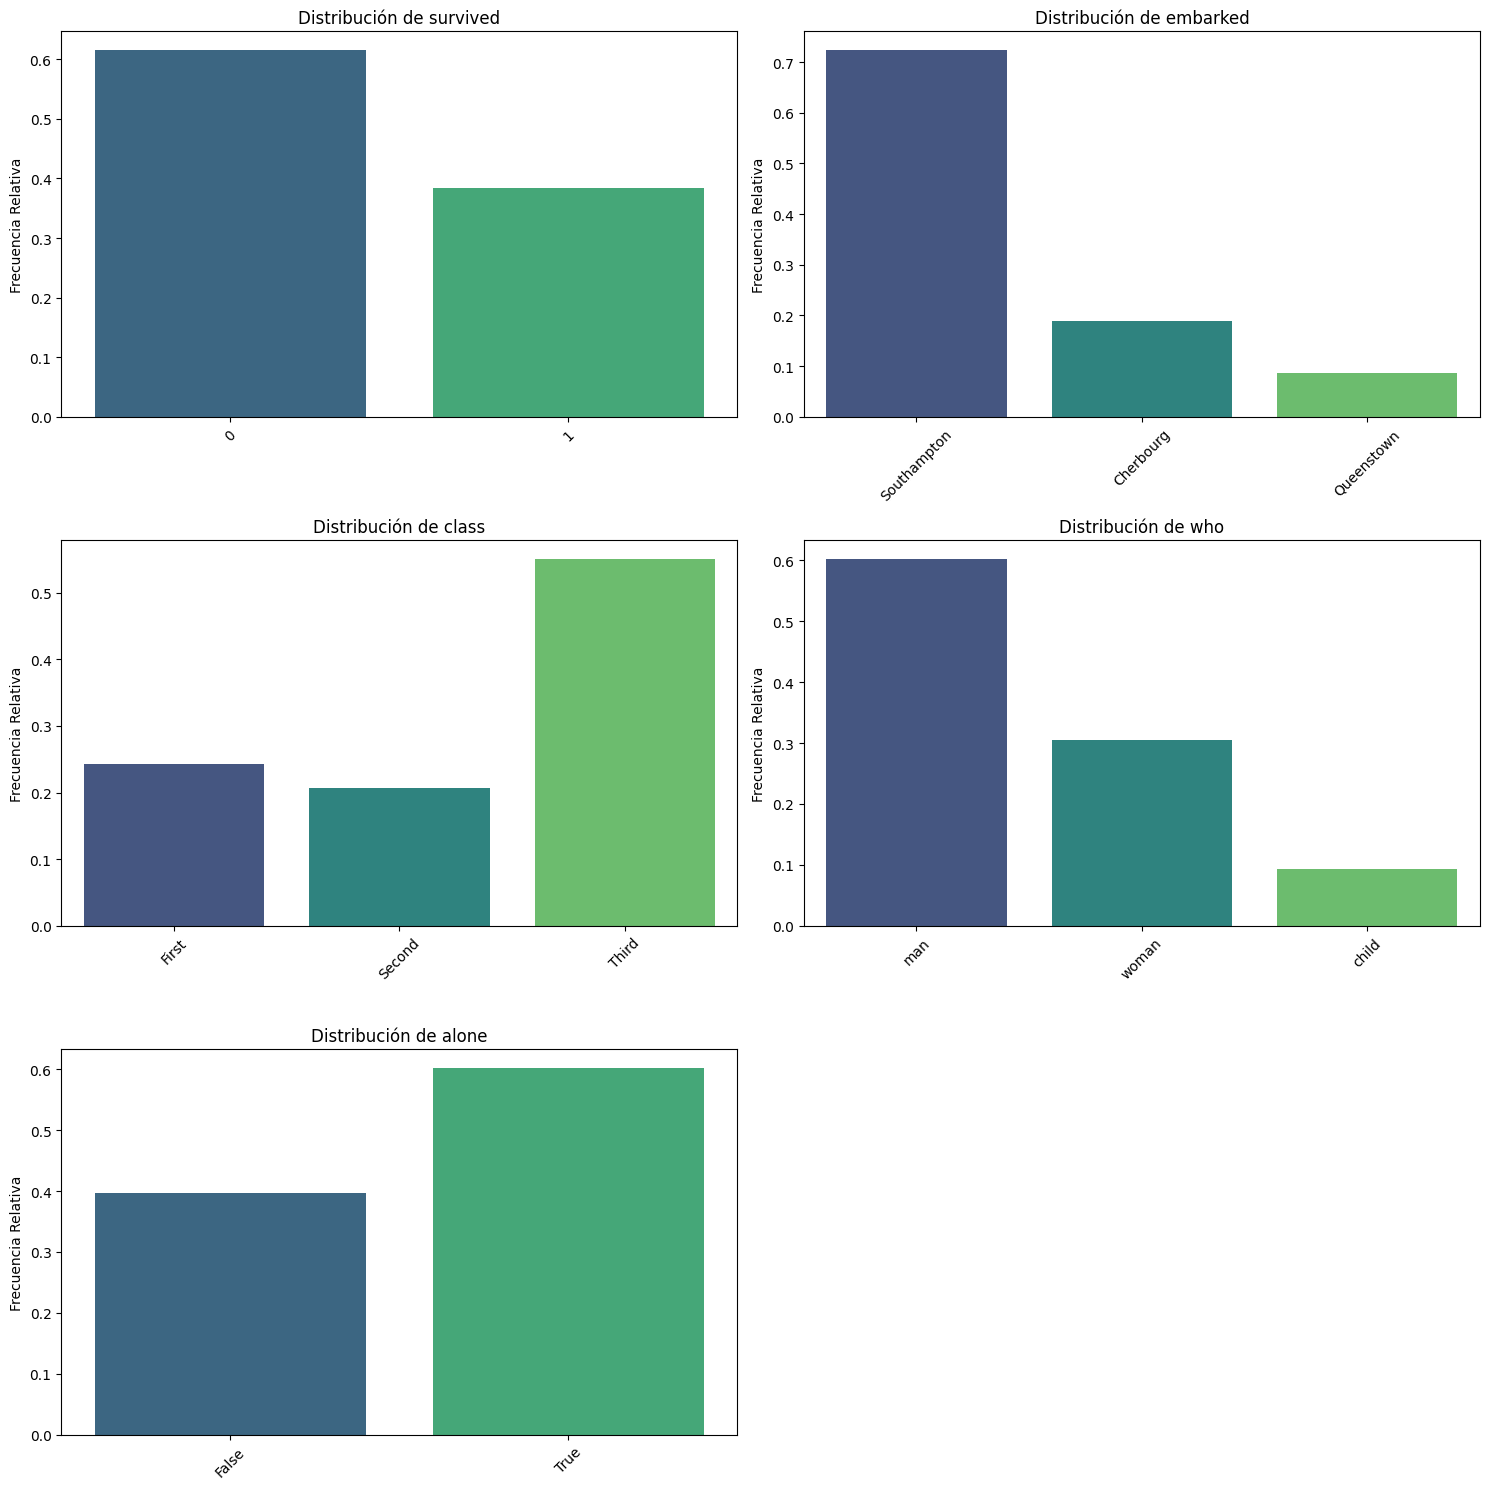

In [ ]:
pinta_distribucion_categoricas(df_titanic, variables_categoricas_priorizadas, relativa=True)

* Medidas posicionales:
    - Percentil

In [74]:
print(df_titanic["age"].quantile(0.5),
    df_titanic["age"].quantile(0.75),
    df_titanic["age"].quantile(0.9),
    df_titanic["age"].max())

28.0 38.0 50.0 80.0


In [75]:
print(df_titanic["fare"].quantile(0.5),
    df_titanic["fare"].quantile(0.75),
    df_titanic["fare"].quantile(0.9),
    df_titanic["fare"].max())

14.4542 31.0 77.9583 512.3292


*
     - Cuartil

In [77]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [78]:
get_IQR(df_titanic,"age")

np.float64(17.875)

In [79]:
get_IQR(df_titanic,"fare")

np.float64(23.0896)

In [91]:
columnas_numericas_priorizadas = df_titanic[["age","fare"]]

columnas_numericas_priorizadas = columnas_numericas_priorizadas.describe().T.index.to_list()
columnas_numericas_priorizadas

['age', 'fare']

In [92]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

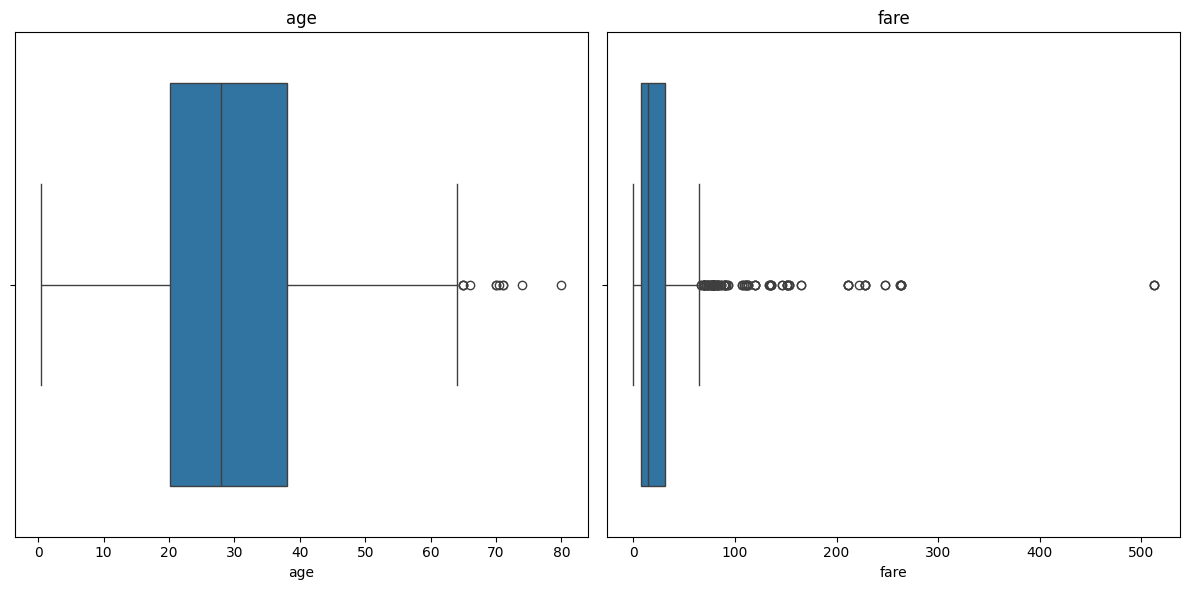

In [93]:
plot_multiple_boxplots(df_titanic, columnas_numericas_priorizadas)

* Bastantes valores anómalos en 'fare', no tanto en 'age'
* Los bigotes de 'age' son más largos, por tanto más dispersión, más cortos en 'fare'
* Las cajas no tienen rangos muy grandes
___________

* Dispersión

In [95]:
df_titanic[columnas_numericas_priorizadas].describe().loc[["std","mean"]].T

,std,mean
age,14.526497,29.699118
fare,49.693429,32.204208


In [96]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T #pasamos por parametro el df_describe, me quedo con la desviacion estandar y media y el traspuesto
    df_var["CV"] = (df_var["std"]/df_var["mean"]) #*100 #creo una nueva columna que es el coeficiente de variacion DESVIACIÓN / MEDIA
    return df_var

In [97]:
variabilidad(df_titanic[columnas_numericas_priorizadas])

,std,mean,CV
age,14.526497,29.699118,0.489122
fare,49.693429,32.204208,1.543073


- Observamos una alta variabilidad, ya que es mayor al 30%
_________________________________
- Dsitribución

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

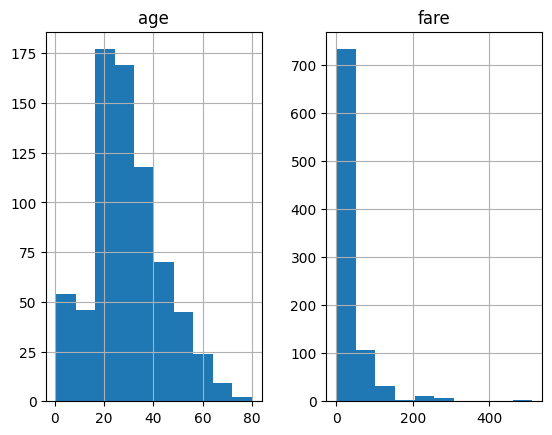

In [102]:
df_titanic[columnas_numericas_priorizadas].hist()

In [112]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

Densidad

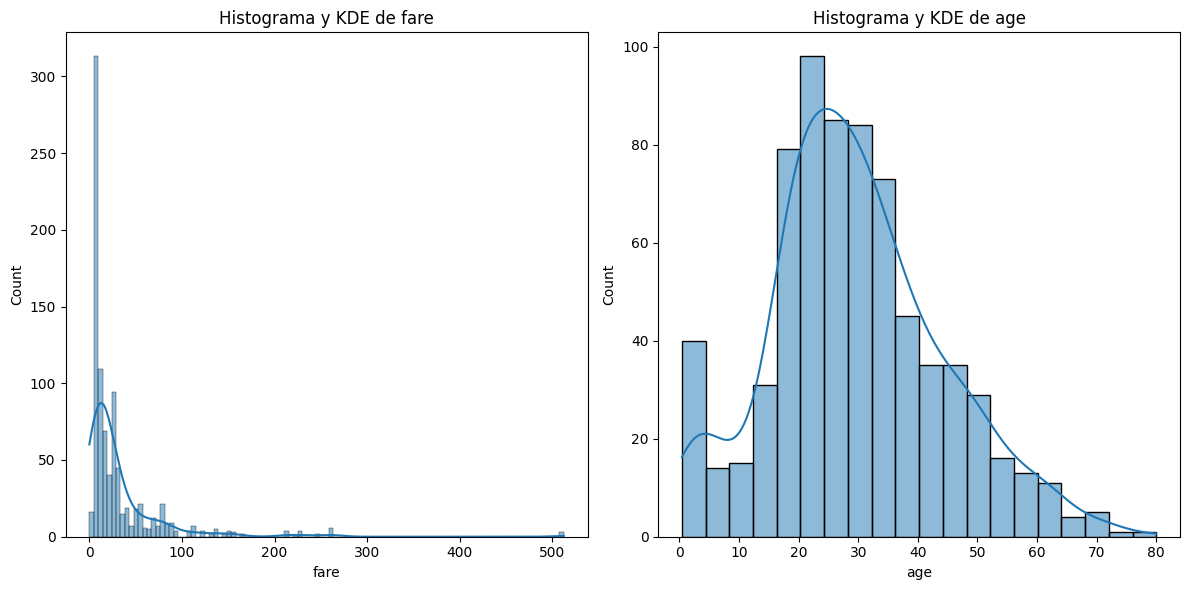

In [115]:
plot_histo_den(df_titanic,["fare","age"])

* 'fare' parece un gráfico "log normal", con una larga cola, mientras que 'age' se parece más a una "gaussiana"
* 'fare tiene un gran pico que habría que mirar.
___________________


* Anomalías y outliers

In [116]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


(2, 2)


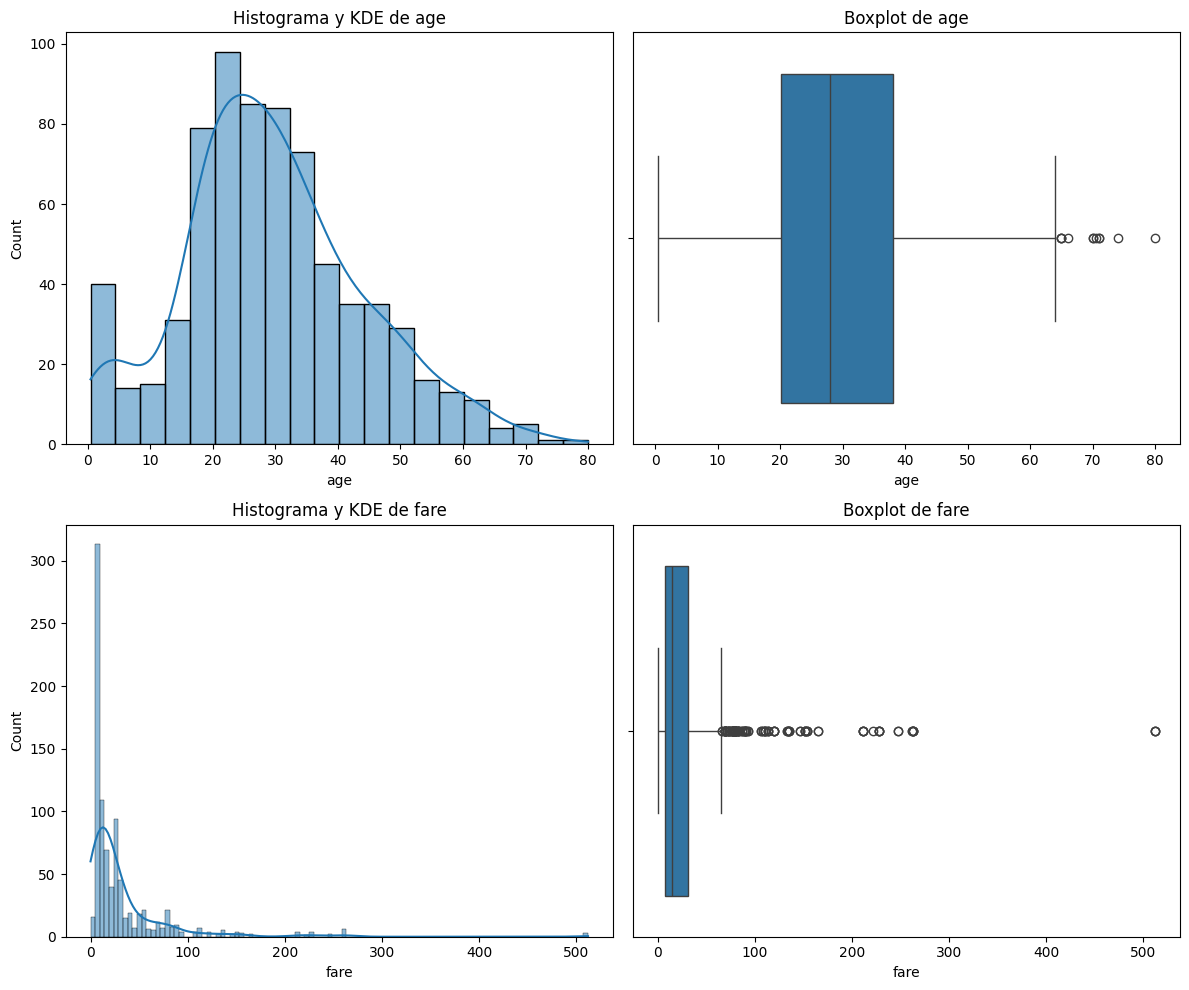

In [118]:
plot_combined_graphs(df_titanic,["age","fare"])

(2,)


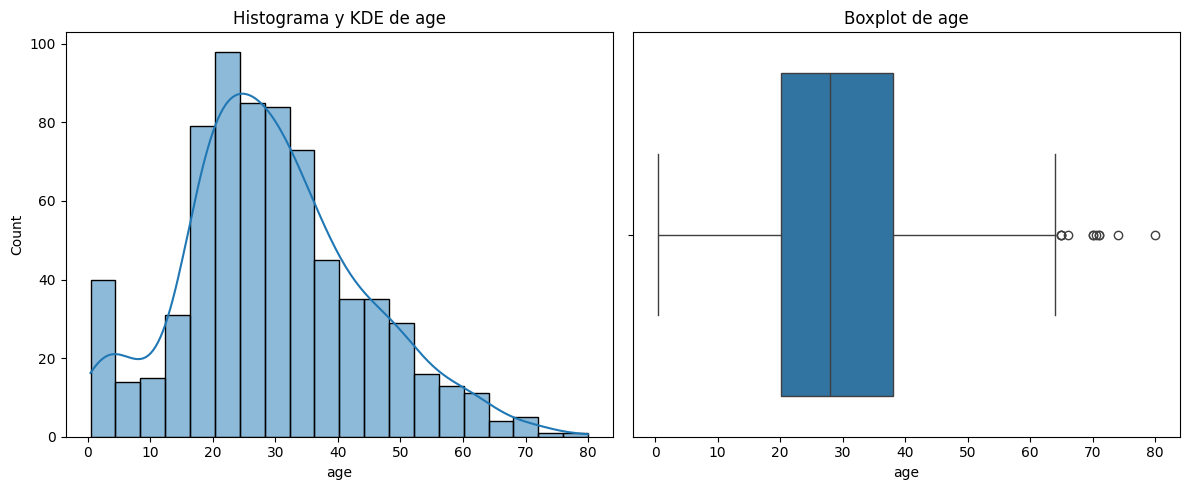

(2,)


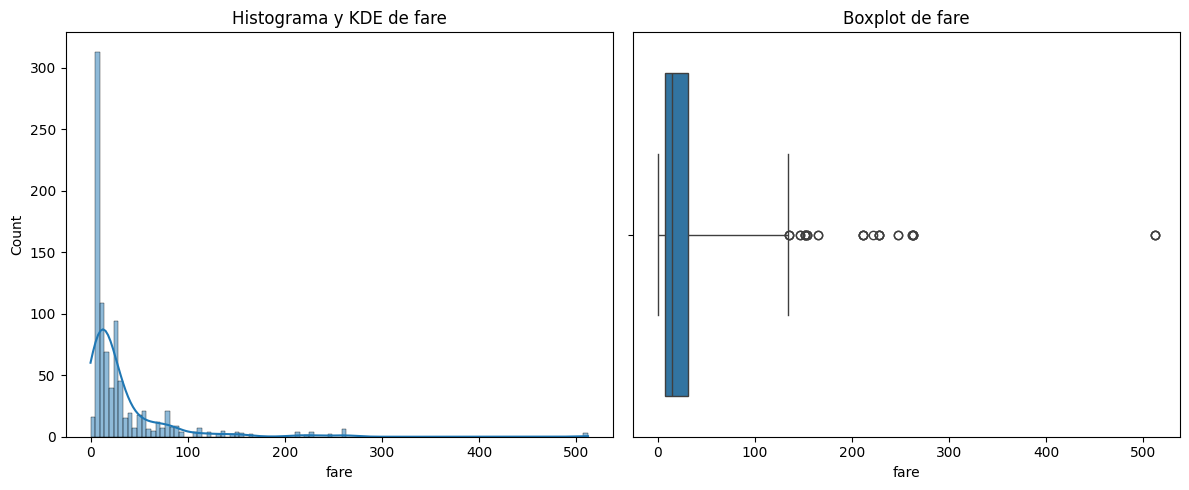

In [123]:
plot_combined_graphs(df_titanic, ["age"], whisker_width= 1.5) 
plot_combined_graphs(df_titanic, ["fare"], whisker_width= 4.5) 

* Tratamiento de outliers para estas dos variables

In [126]:
variables_priorizadas

['survived', 'who', 'age', 'fare', 'class', 'embarked', 'alone']

Conclusiones:
* A pesar de habernos hecho una idea de los datos que se han presentado, hay cosas que hay que analizar más profundamente.
* Habría que estudiar la relación entre los supervivientes y la clase en la que viajaban.
* También desde dónde viajaban y si sobrevivieron
* Hay datos anómalos que hay que estudiar y analizar, sobre todo en 'fare'
* Sería mejor agrupar los datos, como por ejemplo en clases, géneros o la ciudad desde la que embarcan.Ç